In [13]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [14]:
plot_data = {}

In [15]:
top1, top5 = [], []
for b in range(2, 16):
    path = f'/workspace/Weight_compression/hf_model_comp/RTN/clip/clip_L_14_W{b}g128_result.json'
    with open(path, 'r') as f:
        data = json.load(f)
        top1.append(data['iamagenet'][0])
        top5.append(data['iamagenet'][1])
        
print(top1)
print(top5)


plot_data['RTN'] = {'top1': top1, 'top5': top5}
plot_data['RTN']['bit'] = range(2, 16)

[0.00106, 0.00106, 0.00106, 0.00106, 0.00106, 0.00106, 0.00106, 0.00106, 0.71194, 0.71202, 0.71208, 0.71208, 0.71206, 0.71206]
[0.00496, 0.00496, 0.00496, 0.00496, 0.00496, 0.00496, 0.00496, 0.00496, 0.9149, 0.91476, 0.91476, 0.91476, 0.9148, 0.9148]


In [16]:
bit =  [2.265098358234416, 2.63773999078487, 3.14076128270891, 3.93255517993193, 4.760257585261895, 5.964859002327854, 6.329915328400568]
top1 = [0.4159, 0.5724, 0.622, 0.6418, 0.70096, 0.7099, 0.71032]
top5 = [0.6751, 0.8336, 0.8625, 0.8754, 0.91016, 0.9141, 0.9147]


plot_data['NWC_ql(llama_trained)'] = {'top1': top1, 'top5': top5}
plot_data['NWC_ql(llama_trained)']['bit'] = bit

In [17]:
bit =  [2.27731001603248, 2.6495901989096873, 3.152618712526027, 3.9349989225547812]
top1 = [0.06828, 0.12124, 0.59872, 0.59522]
top5 = [0.15818, 0.26686, 0.84898, 0.84534]

plot_data['NWC_ql'] = {'top1': top1, 'top5': top5}
plot_data['NWC_ql']['bit'] = bit

In [18]:
top1, top5 = [], []
for b in range(2, 7):
    path = f'/workspace/Weight_compression/hf_model_comp/qtip/hf/clip-vit-large-patch14_{b}bit_result.json'
    with open(path, 'r') as f:
        data = json.load(f)
        top1.append(data['iamagenet'][0])
        top5.append(data['iamagenet'][1])
        
print(top1)
print(top5)


plot_data['QTIP'] = {'top1': top1, 'top5': top5}
plot_data['QTIP']['bit'] = range(2, 7)

[0.46392, 0.66476, 0.69932, 0.7019, 0.70228]
[0.74344, 0.89356, 0.9093, 0.91188, 0.9118]


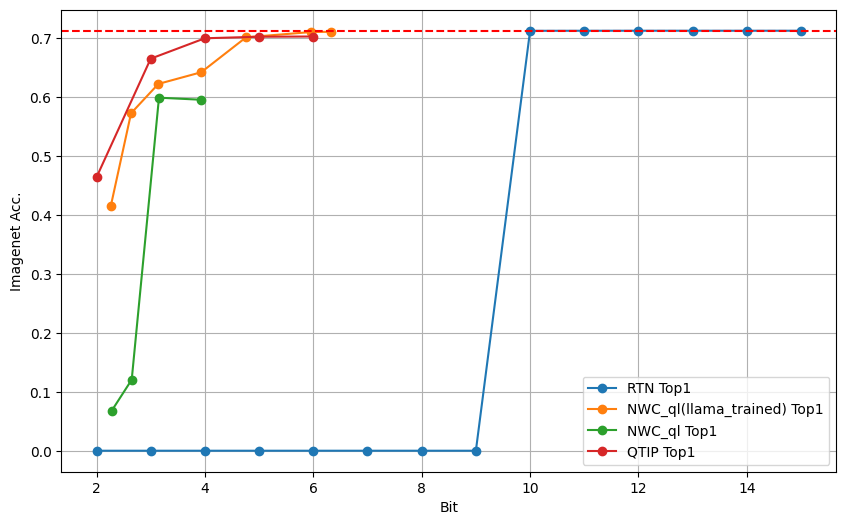

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through the data dictionary and plot each model
for model, model_data in plot_data.items():
    ax.plot(model_data['bit'], model_data['top1'], label=f'{model} Top1', marker='o')
    # ax.plot(model_data['bit'], model_data['top5'], label=f'{model} Top5', marker='o')
# Labels and title
ax.set_xlabel('Bit')
ax.set_ylabel('Imagenet Acc.')
ax.legend()
ax.axhline(y=0.7121, color='r', linestyle='--', label='Top1')
# ax.axhline(y=0.9149, color='r', linestyle='--', label='Top5')

plt.grid(True)
plt.show()